In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv("D:\\Level 3\\Semester 2\\DS-3003 Machine Learning 1\\Project2\\Data set\\Food_Delivery_Times.csv",index_col='Order_ID')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 522 to 103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 970 non-null    object 
 2   Traffic_Level           970 non-null    object 
 3   Time_of_Day             970 non-null    object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  970 non-null    float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 70.3+ KB


In [4]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,,,,,,,,
522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=3003)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 913 to 355
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             700 non-null    float64
 1   Weather                 679 non-null    object 
 2   Traffic_Level           679 non-null    object 
 3   Time_of_Day             684 non-null    object 
 4   Vehicle_Type            700 non-null    object 
 5   Preparation_Time_min    700 non-null    int64  
 6   Courier_Experience_yrs  683 non-null    float64
 7   Delivery_Time_min       700 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 49.2+ KB


In [7]:
train_df.duplicated().any()

False

In [8]:
train_df.isna().sum()

Distance_km                0
Weather                   21
Traffic_Level             21
Time_of_Day               16
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    17
Delivery_Time_min          0
dtype: int64

In [9]:
weather_mode=train_df['Weather'].value_counts().idxmax()
print(weather_mode)
train_df['Weather']=train_df['Weather'].fillna(weather_mode)
test_df['Weather']=test_df['Weather'].fillna(weather_mode)
trafficlevel_mode=train_df['Traffic_Level'].value_counts().idxmax()
print(trafficlevel_mode)
train_df['Traffic_Level']=train_df['Traffic_Level'].fillna(trafficlevel_mode)
test_df['Traffic_Level']=test_df['Traffic_Level'].fillna(trafficlevel_mode)
timeofday_mode=train_df['Time_of_Day'].value_counts().idxmax()
print(timeofday_mode)
train_df['Time_of_Day']=train_df['Time_of_Day'].fillna(timeofday_mode)
test_df['Time_of_Day']=test_df['Time_of_Day'].fillna(timeofday_mode)

Clear
Medium
Morning


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 913 to 355
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             700 non-null    float64
 1   Weather                 700 non-null    object 
 2   Traffic_Level           700 non-null    object 
 3   Time_of_Day             700 non-null    object 
 4   Vehicle_Type            700 non-null    object 
 5   Preparation_Time_min    700 non-null    int64  
 6   Courier_Experience_yrs  683 non-null    float64
 7   Delivery_Time_min       700 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 49.2+ KB


In [11]:
train_df['Courier_Experience_yrs'].nunique()
experience_mode=train_df['Courier_Experience_yrs'].mode()[0]
train_df['Courier_Experience_yrs']=train_df['Courier_Experience_yrs'].fillna(experience_mode)
test_df['Courier_Experience_yrs']=test_df['Courier_Experience_yrs'].fillna(experience_mode)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 913 to 355
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             700 non-null    float64
 1   Weather                 700 non-null    object 
 2   Traffic_Level           700 non-null    object 
 3   Time_of_Day             700 non-null    object 
 4   Vehicle_Type            700 non-null    object 
 5   Preparation_Time_min    700 non-null    int64  
 6   Courier_Experience_yrs  700 non-null    float64
 7   Delivery_Time_min       700 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 49.2+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 378 to 446
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             300 non-null    float64
 1   Weather                 300 non-null    object 
 2   Traffic_Level           300 non-null    object 
 3   Time_of_Day             300 non-null    object 
 4   Vehicle_Type            300 non-null    object 
 5   Preparation_Time_min    300 non-null    int64  
 6   Courier_Experience_yrs  300 non-null    float64
 7   Delivery_Time_min       300 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 21.1+ KB


In [14]:
hot_cols = ['Weather' , 'Vehicle_Type' , 'Time_of_Day']

In [15]:
train_df = pd.get_dummies(train_df, columns=hot_cols, drop_first=True,  dtype=int)
test_df = pd.get_dummies(test_df, columns=hot_cols, drop_first=True,  dtype=int)

In [16]:
train_df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Car,Vehicle_Type_Scooter,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
Order_ID,,,,,,,,,,,,,,
913,12.67,Medium,7,3.0,43,0,0,0,1,0,1,0,1,0
553,11.26,High,14,2.0,70,1,0,0,0,0,0,0,0,0
552,17.12,Low,26,3.0,86,0,1,0,0,0,0,0,1,0
812,16.86,Medium,13,4.0,88,0,0,1,0,1,0,0,0,0
821,16.16,High,11,1.0,82,0,0,0,0,0,0,0,0,0


In [17]:
traffic_levels = [['Low', 'Medium', 'High']] 
ordinal_encoder = OrdinalEncoder(categories=traffic_levels)

# Apply encoding to both train and test datasets
train_df[['Traffic_Level']] = ordinal_encoder.fit_transform(train_df[['Traffic_Level']])
test_df[['Traffic_Level']] = ordinal_encoder.transform(test_df[['Traffic_Level']])

In [18]:
train_df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Car,Vehicle_Type_Scooter,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
Order_ID,,,,,,,,,,,,,,
913,12.67,1.0,7,3.0,43,0,0,0,1,0,1,0,1,0
553,11.26,2.0,14,2.0,70,1,0,0,0,0,0,0,0,0
552,17.12,0.0,26,3.0,86,0,1,0,0,0,0,0,1,0
812,16.86,1.0,13,4.0,88,0,0,1,0,1,0,0,0,0
821,16.16,2.0,11,1.0,82,0,0,0,0,0,0,0,0,0


In [19]:
train_df.isnull().sum()

Distance_km               0
Traffic_Level             0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
dtype: int64

In [20]:
x_train=train_df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter',
       'Traffic_Level']]
y_train=train_df['Delivery_Time_min']

x_test=test_df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter',
       'Traffic_Level']]
y_test=test_df['Delivery_Time_min']

In [21]:
## Scaling

scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
# Transform features
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [22]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

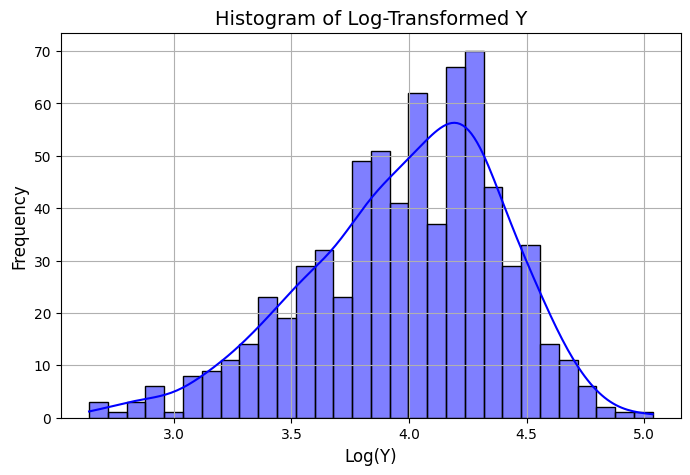

In [23]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(y_train_log, bins=30, kde=True, color='blue')

# Titles and labels
plt.title("Histogram of Log-Transformed Y", fontsize=14)
plt.xlabel("Log(Y)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Show plot
plt.show()

In [24]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
y_train_boxcox, lambda_train = boxcox(y_train)
y_test_boxcox = boxcox(y_test, lmbda=lambda_train)

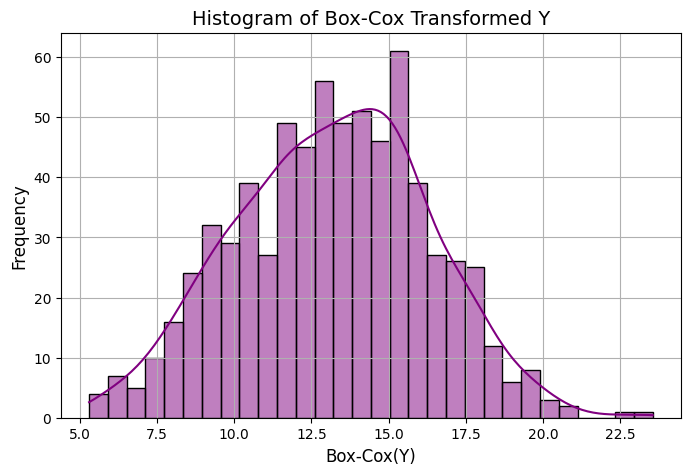

Optimal lambda for Box-Cox Transformation: 0.5102


In [25]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(y_train_boxcox, bins=30, kde=True, color='purple')

# Titles and labels
plt.title("Histogram of Box-Cox Transformed Y", fontsize=14)
plt.xlabel("Box-Cox(Y)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Show plot
plt.show()

# Print the lambda value used in Box-Cox
print(f"Optimal lambda for Box-Cox Transformation: {lambda_train:.4f}")

## Lasso Regression

In [26]:
# LASSO REGRESSION

param_grid_lasso = {
    'alpha': np.logspace(-4, 2, 50)
}

lasso_model_tuned = Lasso(max_iter=5000)
grid_search_lasso = GridSearchCV(lasso_model_tuned, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train_boxcox)

best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best parameters for Lasso Regression:", best_params_lasso)
print("Best score for Lasso Regression:", best_score_lasso)

Best parameters for Lasso Regression: {'alpha': 0.021209508879201904}
Best score for Lasso Regression: -1.8802776052129335


In [27]:
lasso_model_best = Lasso(**best_params_lasso,max_iter=5000)
lasso_model_best.fit(X_train_scaled, y_train_boxcox)

# Predictions on the training set
lasso_train_predictions = lasso_model_best.predict(X_train_scaled)

# Predictions on the test set
lasso_test_predictions = lasso_model_best.predict(X_test_scaled)

from scipy.special import inv_boxcox

# Convert Lasso predictions back to the original scale
lasso_train_predictions_original = inv_boxcox(lasso_train_predictions, lambda_train)
lasso_test_predictions_original = inv_boxcox(lasso_test_predictions, lambda_train)

In [28]:
# MSE for training and test sets
lasso_train_mse = mean_squared_error(y_train, lasso_train_predictions_original)
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions_original)

# RMSE for training and test sets
lasso_train_rmse = root_mean_squared_error(y_train, lasso_train_predictions_original)
lasso_test_rmse = root_mean_squared_error(y_test, lasso_test_predictions_original)

# MAE for training and test sets
lasso_train_mae = mean_absolute_error(y_train, lasso_train_predictions_original)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_predictions_original)

# R² for training and test sets
lasso_train_r2 = r2_score(y_train, lasso_train_predictions_original)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions_original)


print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Train MAE:", lasso_train_mae)
print("Lasso Regression Train R²:", lasso_train_r2)

print("Lasso Regression Test MSE:", lasso_test_mse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Lasso Regression Test MAE:", lasso_test_mae)
print("Lasso Regression Test R²:", lasso_test_r2)

Lasso Regression Train MSE: 115.6406165729303
Lasso Regression Train RMSE: 10.753632715177243
Lasso Regression Train MAE: 6.683219648394058
Lasso Regression Train R²: 0.7633999435040987
Lasso Regression Test MSE: 115.46660375363135
Lasso Regression Test RMSE: 10.745538783775867
Lasso Regression Test MAE: 6.80883896384446
Lasso Regression Test R²: 0.7597032060625948


In [29]:
feature_names = x_train.columns  # Get feature names from DataFrame
print("Number of non-zero coefficients:", np.sum(lasso_model_best.coef_ != 0))
lasso_coefficients = lasso_model_best.coef_  # Get LASSO coefficients
lasso_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Sort by absolute coefficient values (important features first)
lasso_results = lasso_results.sort_values(by="Coefficient", ascending=False)

print(lasso_results)


Number of non-zero coefficients: 11
                   Feature  Coefficient
0              Distance_km     2.393997
1     Preparation_Time_min     0.985409
12           Traffic_Level     0.644376
5            Weather_Snowy     0.374396
3            Weather_Foggy     0.269985
4            Weather_Rainy     0.202115
6            Weather_Windy     0.021697
7      Time_of_Day_Evening     0.020022
9        Time_of_Day_Night    -0.000000
10        Vehicle_Type_Car     0.000000
8      Time_of_Day_Morning    -0.005147
11    Vehicle_Type_Scooter    -0.064250
2   Courier_Experience_yrs    -0.254977


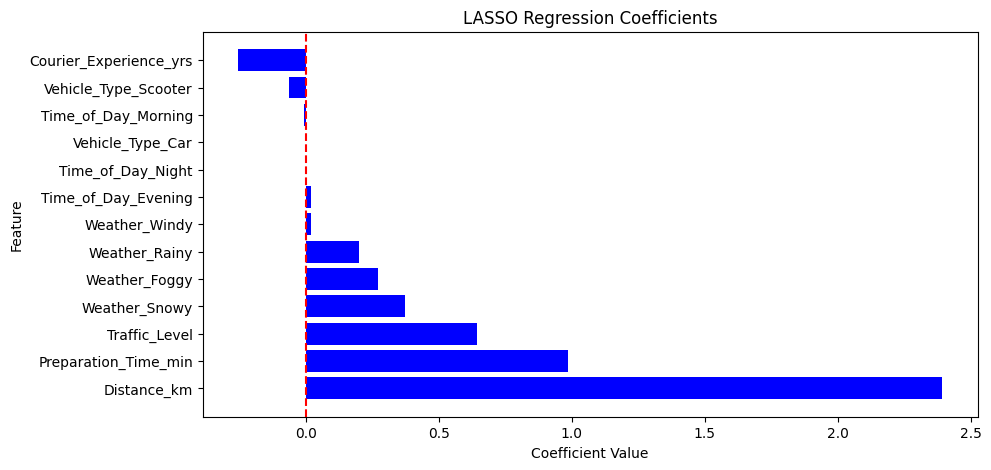

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(lasso_results['Feature'], lasso_results['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('LASSO Regression Coefficients')
plt.axvline(0, color='red', linestyle='dashed')  # Mark zero line
plt.show()


## Elastic Net

In [31]:
# Import necessary libraries

# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  # Exploring a wider range of alpha values
    'l1_ratio': np.linspace(0.1, 0.9, 9)   # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=5)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(X_train_scaled, y_train_boxcox)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

Best parameters for Elastic Net Regression: {'alpha': 0.021209508879201904, 'l1_ratio': 0.9}
Best score for Elastic Net Regression: -1.8782034690896423


In [32]:
# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(X_train_scaled, y_train_boxcox)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(X_train_scaled)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(X_test_scaled)

# Convert Elastic Net predictions back to the original scale
elasticnet_train_predictions_original = inv_boxcox(elasticnet_train_predictions, lambda_train)
elasticnet_test_predictions_original = inv_boxcox(elasticnet_test_predictions, lambda_train)

In [33]:
# Compute Performance Metrics

# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(y_train, elasticnet_train_predictions_original)
elasticnet_test_mse = mean_squared_error(y_test, elasticnet_test_predictions_original)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = root_mean_squared_error(y_train, elasticnet_train_predictions_original)
elasticnet_test_rmse = root_mean_squared_error(y_test, elasticnet_test_predictions_original)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(y_train, elasticnet_train_predictions_original)
elasticnet_test_mae = mean_absolute_error(y_test, elasticnet_test_predictions_original)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(y_train, elasticnet_train_predictions_original)
elasticnet_test_r2 = r2_score(y_test, elasticnet_test_predictions_original)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse


In [34]:
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 115.59663160988251
Elastic Net Regression Test MSE: 115.4422363260174
Elastic Net Regression Train RMSE: 10.751587399536987
Elastic Net Regression Test RMSE: 10.744404884683814
Elastic Net Regression Train MAE: 6.681857018942922
Elastic Net Regression Test MAE: 6.807761652385999
Elastic Net Regression Train R²: 0.7634899364931581
Elastic Net Regression Test R²: 0.7597539169568428
Elastic Net Train-Test MSE Difference: 0.1543952838651137


In [35]:
# Get feature coefficients
elasticnet_coefficients = elasticnet_model_best.coef_

# Get feature names (if using a DataFrame)
feature_names = x_train.columns

# Create a dictionary of feature names and their coefficients
selected_features = {feature: coef for feature, coef in zip(feature_names, elasticnet_coefficients) if coef != 0}

print("Selected Features by Elastic Net:")
print(selected_features)

Selected Features by Elastic Net:
{'Distance_km': 2.390624314395032, 'Preparation_Time_min': 0.9853576681548264, 'Courier_Experience_yrs': -0.25685298313810667, 'Weather_Foggy': 0.27204058793300606, 'Weather_Rainy': 0.20563825745844194, 'Weather_Snowy': 0.37693940009818466, 'Weather_Windy': 0.024481535294218253, 'Time_of_Day_Evening': 0.021663111143141792, 'Time_of_Day_Morning': -0.006469338912074892, 'Vehicle_Type_Car': 0.000488868590471145, 'Vehicle_Type_Scooter': -0.06583318513725438, 'Traffic_Level': 0.6454163610041497}


## Ridge Regression

In [36]:
# Define hyperparameter grid
param_grid_ridge = {
    'alpha': np.logspace(-4, 2, 50)  # Regularization strength
}

# Perform Grid Search for best hyperparameters
ridge_model_tuned = Ridge()
grid_search_ridge = GridSearchCV(ridge_model_tuned, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train_boxcox)

# Get best parameters & score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge Regression:", best_params_ridge)
print("Best score for Ridge Regression:", best_score_ridge)

Best parameters for Ridge Regression: {'alpha': 1.4563484775012443}
Best score for Ridge Regression: -1.8845310277759597


In [37]:
# Fit model with best parameters
ridge_model_best = Ridge(**best_params_ridge)
ridge_model_best.fit(X_train_scaled, y_train_boxcox)

# Predictions on the training set
ridge_train_predictions = ridge_model_best.predict(X_train_scaled)

# Predictions on the test set
ridge_test_predictions = ridge_model_best.predict(X_test_scaled)

# Convert Ridge predictions back to the original scale
ridge_train_predictions_original = inv_boxcox(ridge_train_predictions, lambda_train)
ridge_test_predictions_original = inv_boxcox(ridge_test_predictions, lambda_train)

In [38]:
# Compute Performance Metrics
ridge_train_mse = mean_squared_error(y_train, ridge_train_predictions_original)
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions_original)

ridge_train_rmse = root_mean_squared_error(y_train, ridge_train_predictions_original)
ridge_test_rmse = root_mean_squared_error(y_test, ridge_test_predictions_original)

ridge_train_mae = mean_absolute_error(y_train, ridge_train_predictions_original)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_predictions_original)

ridge_train_r2 = r2_score(y_train, ridge_train_predictions_original)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions_original)

# MSE Difference (Overfitting Indicator)
ridge_mse_difference = ridge_train_mse - ridge_test_mse

# Print results
print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Train R²:", ridge_train_r2)
print("Ridge Regression Test R²:", ridge_test_r2)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

Ridge Regression Train MSE: 115.83861858986829
Ridge Regression Test MSE: 115.2356899679116
Ridge Regression Train RMSE: 10.762835062838615
Ridge Regression Test RMSE: 10.734788771462231
Ridge Regression Train MAE: 6.652015265420341
Ridge Regression Test MAE: 6.781910636461802
Ridge Regression Train R²: 0.7629948324818456
Ridge Regression Test R²: 0.7601837592319146
Ridge Train-Test MSE Difference: 0.6029286219566927


In [39]:
import pandas as pd

ridge_coefficients = ridge_model_best.coef_

# Convert scaled data back to DataFrame (assuming you know the original feature names)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x_train.columns)

print("Ridge Regression Coefficients:")
for feature, coef in zip(X_train_scaled_df.columns, ridge_coefficients):
    print(f"{feature}: {coef}")


Ridge Regression Coefficients:
Distance_km: 2.4056090949423035
Preparation_Time_min: 1.0028315522123852
Courier_Experience_yrs: -0.27830196054442197
Weather_Foggy: 0.2980011510481084
Weather_Rainy: 0.24228003662761538
Weather_Snowy: 0.40603925920833583
Weather_Windy: 0.050732567660390936
Time_of_Day_Evening: 0.031549337511679744
Time_of_Day_Morning: -0.025392758973664584
Time_of_Day_Night: -0.011240115145340684
Vehicle_Type_Car: 0.014343509883798646
Vehicle_Type_Scooter: -0.07748072930610728
Traffic_Level: 0.6677396904364232


## Removing outliers

In [40]:
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_outliers = lof_model.fit_predict(X_train_scaled)

lof_outliers_indices = np.where(lof_outliers == -1)[0]


In [41]:
print("Indices of outliers detected by LOF:", lof_outliers_indices)
num_outliers = len(lof_outliers_indices)
print("Number of outliers detected by LOF:", num_outliers)

Indices of outliers detected by LOF: [ 13  14  18  19  20  23  35  48  56  62  65  67  69  71  73  79  85  91
 126 134 143 163 164 175 189 219 223 230 237 241 244 263 265 270 273 280
 290 306 314 322 328 345 383 394 417 419 423 438 439 452 469 471 472 480
 482 498 530 534 537 542 552 554 591 605 615 628 632 652 667 690]
Number of outliers detected by LOF: 70


In [42]:
X_train_scaled_cleaned = np.delete(X_train_scaled, lof_outliers_indices, axis=0)
Y_train_cleaned = np.delete(y_train, lof_outliers_indices, axis=0)

In [43]:
# Apply Box-Cox transformation to Y_train_cleaned
Y_train_cleaned_boxcox, lambda_train = boxcox(Y_train_cleaned)

# Transform Y_test using the same lambda value from training
Y_test_transformed = boxcox(y_test, lmbda=lambda_train)

## Ridge regression after removing outliers

In [44]:
# Define hyperparameter grid
param_grid_ridge = {
    'alpha': np.logspace(-4, 2, 50)  # Regularization strength
}

# Perform Grid Search for best hyperparameters
ridge_model_tuned = Ridge()
grid_search_ridge = GridSearchCV(ridge_model_tuned, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled_cleaned, Y_train_cleaned_boxcox)

# Get best parameters & score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge Regression:", best_params_ridge)
print("Best score for Ridge Regression:", best_score_ridge)

Best parameters for Ridge Regression: {'alpha': 1.4563484775012443}
Best score for Ridge Regression: -1.4020366970358416


In [45]:
# Fit model with best parameters
ridge_model_best = Ridge(**best_params_ridge)
ridge_model_best.fit(X_train_scaled_cleaned, Y_train_cleaned_boxcox)

# Predictions on the training set
ridge_train_predictions = ridge_model_best.predict(X_train_scaled_cleaned)

# Predictions on the test set
ridge_test_predictions = ridge_model_best.predict(X_test_scaled)

# Convert Ridge predictions back to the original scale
ridge_train_predictions_original = inv_boxcox(ridge_train_predictions, lambda_train)
ridge_test_predictions_original = inv_boxcox(ridge_test_predictions, lambda_train)

In [46]:
# Compute Performance Metrics
ridge_train_mse = mean_squared_error(Y_train_cleaned, ridge_train_predictions_original)
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions_original)

ridge_train_rmse = root_mean_squared_error(Y_train_cleaned, ridge_train_predictions_original)
ridge_test_rmse = root_mean_squared_error(y_test, ridge_test_predictions_original)

ridge_train_mae = mean_absolute_error(Y_train_cleaned, ridge_train_predictions_original)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_predictions_original)

ridge_train_r2 = r2_score(Y_train_cleaned, ridge_train_predictions_original)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions_original)

# MSE Difference (Overfitting Indicator)
ridge_mse_difference = ridge_train_mse - ridge_test_mse

# Print results
print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Train R²:", ridge_train_r2)
print("Ridge Regression Test R²:", ridge_test_r2)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

Ridge Regression Train MSE: 112.85674408316855
Ridge Regression Test MSE: 116.23998609485612
Ridge Regression Train RMSE: 10.623405484267677
Ridge Regression Test RMSE: 10.781464932691481
Ridge Regression Train MAE: 6.536611478399919
Ridge Regression Test MAE: 6.733585554351576
Ridge Regression Train R²: 0.766050607890029
Ridge Regression Test R²: 0.7580937251300764
Ridge Train-Test MSE Difference: -3.383242011687571


## Ridge regression after removing outliers

In [47]:
# LASSO REGRESSION

param_grid_lasso = {
    'alpha': np.logspace(-4, 2, 50)
}

lasso_model_tuned = Lasso(max_iter=5000)
grid_search_lasso = GridSearchCV(lasso_model_tuned, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled_cleaned, Y_train_cleaned_boxcox)

best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best parameters for Lasso Regression:", best_params_lasso)
print("Best score for Lasso Regression:", best_score_lasso)

Best parameters for Lasso Regression: {'alpha': 0.012067926406393288}
Best score for Lasso Regression: -1.4066121858293106


In [48]:
lasso_model_best = Lasso(**best_params_lasso,max_iter=5000)
lasso_model_best.fit(X_train_scaled_cleaned, Y_train_cleaned_boxcox)

# Predictions on the training set
lasso_train_predictions = lasso_model_best.predict(X_train_scaled_cleaned)

# Predictions on the test set
lasso_test_predictions = lasso_model_best.predict(X_test_scaled)

from scipy.special import inv_boxcox

# Convert Lasso predictions back to the original scale
lasso_train_predictions_original = inv_boxcox(lasso_train_predictions, lambda_train)
lasso_test_predictions_original = inv_boxcox(lasso_test_predictions, lambda_train)

In [49]:
# MSE for training and test sets
lasso_train_mse = mean_squared_error(Y_train_cleaned, lasso_train_predictions_original)
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions_original)

# RMSE for training and test sets
lasso_train_rmse = root_mean_squared_error(Y_train_cleaned, lasso_train_predictions_original)
lasso_test_rmse = root_mean_squared_error(y_test, lasso_test_predictions_original)

# MAE for training and test sets
lasso_train_mae = mean_absolute_error(Y_train_cleaned, lasso_train_predictions_original)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_predictions_original)

# R² for training and test sets
lasso_train_r2 = r2_score(Y_train_cleaned, lasso_train_predictions_original)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions_original)


print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Train MAE:", lasso_train_mae)
print("Lasso Regression Train R²:", lasso_train_r2)

print("Lasso Regression Test MSE:", lasso_test_mse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Lasso Regression Test MAE:", lasso_test_mae)
print("Lasso Regression Test R²:", lasso_test_r2)

Lasso Regression Train MSE: 112.76604409431582
Lasso Regression Train RMSE: 10.6191357508187
Lasso Regression Train MAE: 6.532261906472082
Lasso Regression Train R²: 0.7662386268465288
Lasso Regression Test MSE: 115.71836594223132
Lasso Regression Test RMSE: 10.75724713587223
Lasso Regression Test MAE: 6.738885693241723
Lasso Regression Test R²: 0.7591792654183863


## MLR

In [50]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train_scaled_cleaned, Y_train_cleaned_boxcox)

LinearRegression()

In [51]:
# Predictions on the training set
mlr_train_predictions = mlr.predict(X_train_scaled_cleaned)

# Predictions on the test set
mlr_test_predictions = mlr.predict(X_test_scaled)

from scipy.special import inv_boxcox

# Convert Lasso predictions back to the original scale
mlr_train_predictions_original = inv_boxcox(mlr_train_predictions, lambda_train)
mlr_test_predictions_original = inv_boxcox(mlr_test_predictions, lambda_train)

In [52]:
# MSE for training and test sets
mlr_train_mse = mean_squared_error(Y_train_cleaned, mlr_train_predictions_original)
mlr_test_mse = mean_squared_error(y_test, mlr_test_predictions_original)

# RMSE for training and test sets
mlr_train_rmse = root_mean_squared_error(Y_train_cleaned, mlr_train_predictions_original)
mlr_test_rmse = root_mean_squared_error(y_test, mlr_test_predictions_original)

# MAE for training and test sets
mlr_train_mae = mean_absolute_error(Y_train_cleaned, mlr_train_predictions_original)
mlr_test_mae = mean_absolute_error(y_test, mlr_test_predictions_original)

# R² for training and test sets
mlr_train_r2 = r2_score(Y_train_cleaned, mlr_train_predictions_original)
mlr_test_r2 = r2_score(y_test, mlr_test_predictions_original)


print("mlr Regression Train MSE:", mlr_train_mse)
print("mlr Regression Train RMSE:", mlr_train_rmse)
print("mlr Regression Train MAE:", mlr_train_mae)
print("mlr Regression Train R²:", mlr_train_r2)

print("mlr Regression Test MSE:", mlr_test_mse)
print("mlr Regression Test RMSE:", mlr_test_rmse)
print("mlr Regression Test MAE:", mlr_test_mae)
print("mlr Regression Test R²:", mlr_test_r2)

mlr Regression Train MSE: 112.93830884626936
mlr Regression Train RMSE: 10.62724370880189
mlr Regression Train MAE: 6.534829951648994
mlr Regression Train R²: 0.7658815260429489
mlr Regression Test MSE: 116.29217369335313
mlr Regression Test RMSE: 10.783884907274981
mlr Regression Test MAE: 6.7317752778042514
mlr Regression Test R²: 0.7579851178601434


## Tree based methods

In [112]:
data = pd.read_csv("D:\\Level 3\\Semester 2\\DS-3003 Machine Learning 1\\Project2\\Data set\\Food_Delivery_Times.csv")

In [113]:
weather_mode=data['Weather'].value_counts().idxmax()
data['Weather']=data['Weather'].fillna(weather_mode)

trafficlevel_mode=data['Traffic_Level'].value_counts().idxmax()
data['Traffic_Level']=data['Traffic_Level'].fillna(trafficlevel_mode)

timeofday_mode=data['Time_of_Day'].value_counts().idxmax()
data['Time_of_Day']=data['Time_of_Day'].fillna(timeofday_mode)

data['Courier_Experience_yrs'].nunique()
experience_mode=data['Courier_Experience_yrs'].mode()[0]
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(experience_mode)
data = data.drop('Order_ID',axis=1)

In [114]:
data = pd.get_dummies(data, columns=['Weather','Time_of_Day','Vehicle_Type'], drop_first=True)
data['Traffic_Level'] = data['Traffic_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [115]:
X = data.drop('Delivery_Time_min',axis=1)
Y = data['Delivery_Time_min']

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=3003)

## Decision tree

In [117]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

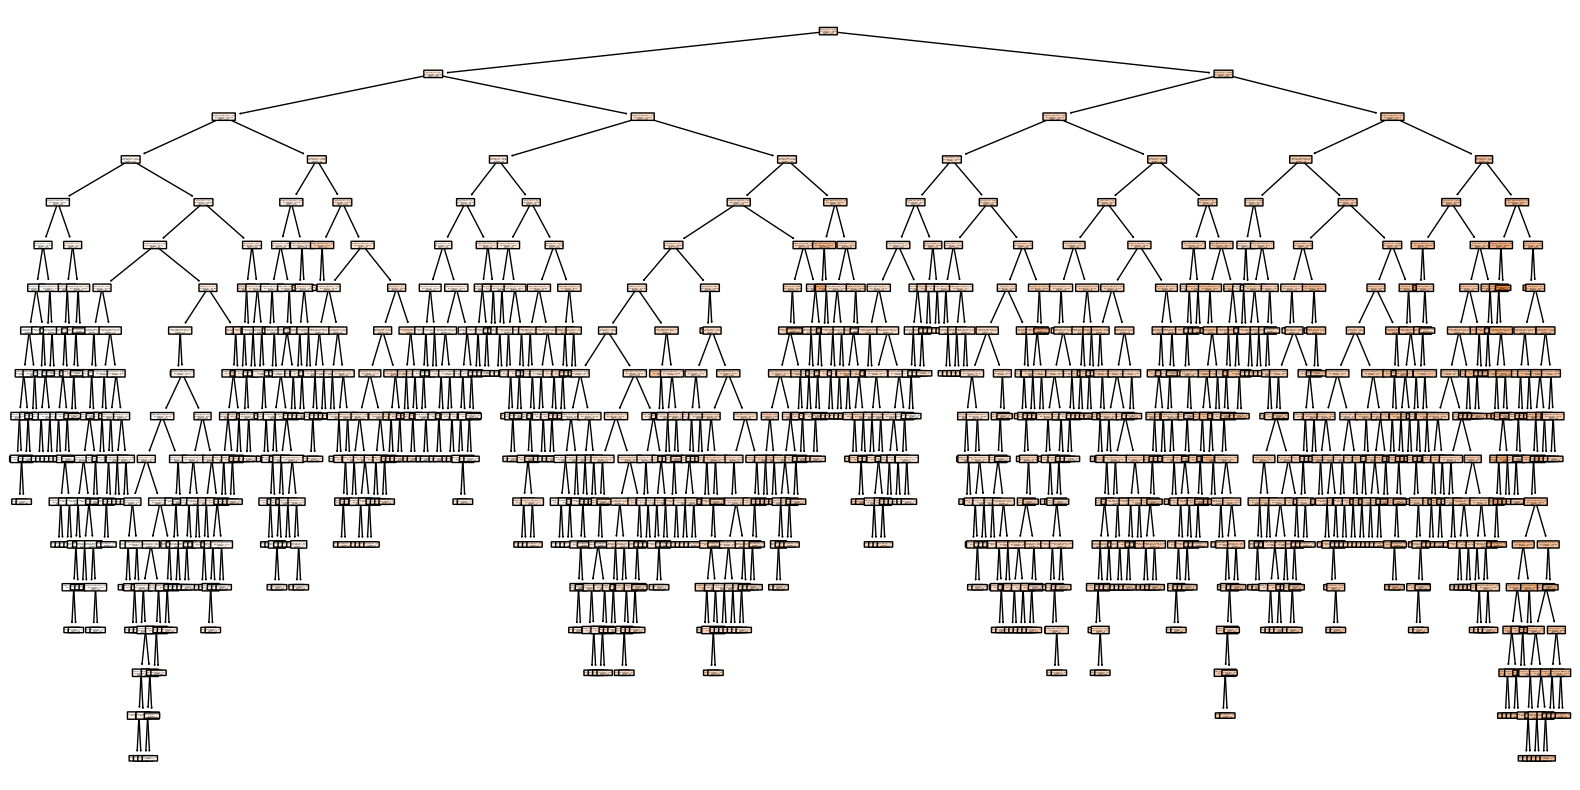

In [118]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [119]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Default Tree MSE: {mse} and R²: {r2}")

Default Tree MSE: 248.35333333333332 and R²: 0.4831535021935651


In [120]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
grid_param = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": range(2, 15, 1),
    "min_samples_leaf": range(1, 15, 1),
    "min_samples_split": range(2, 15, 1)
}

# Initialize the regressor
reg = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=10, n_jobs=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 8, 'splitter': 'random'}


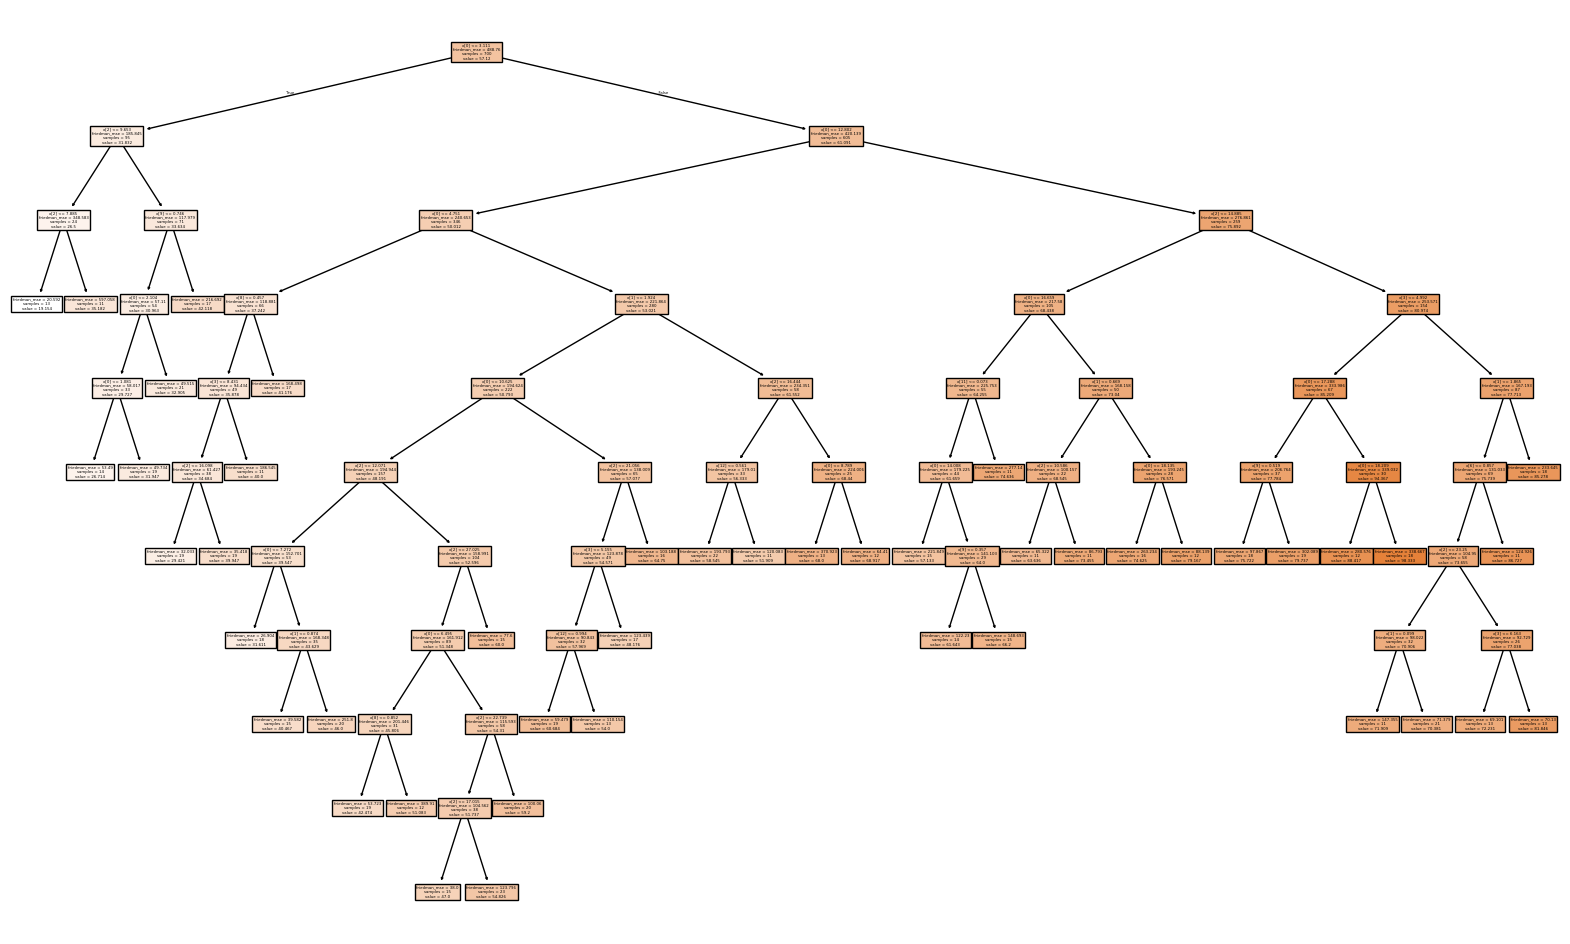

In [121]:
# Use the best parameters to initialize the regressor
best_reg = DecisionTreeRegressor(**grid_search.best_params_)
best_reg.fit(X_train, y_train)

# Plot the tree (optional)
plt.figure(figsize=(20,12))
plot_tree(best_reg, filled=True)
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = best_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Best Tree Train MSE: {mse} and Train R²: {r2}")

Best Tree Train MSE: 142.9603298957515 and Train R²: 0.7075039624276331


In [123]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Tree Test MSE: {mse} and Test R²: {r2}")

Best Tree Test MSE: 158.53960731969298 and Test R²: 0.6700642600322495


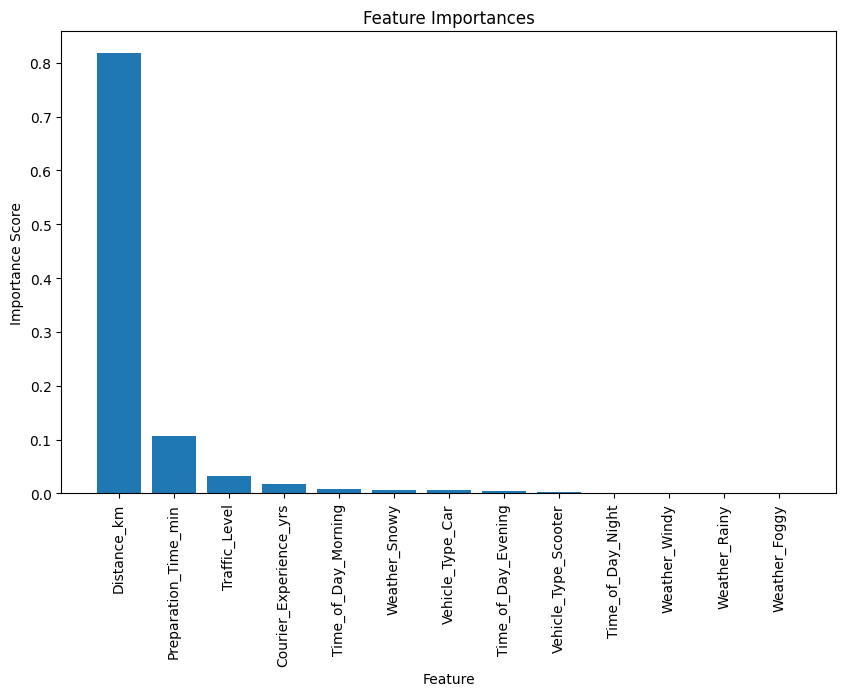

In [124]:
importances = best_reg.feature_importances_

# Get feature names (if available)
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

## XGBoost

In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# Initialize the XGBRegressor
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)

In [127]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5],  # Fewer options
    'min_child_weight': [1, 3],  # Fewer options
    'subsample': [0.8],  # Single value
    'colsample_bytree': [0.8],  # Single value
    'gamma': [0, 0.1],  # Fewer options
    'reg_alpha': [0, 0.1],  # Fewer options
    'reg_lambda': [0, 0.1]  # Fewer options
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [128]:
# Train the model with the best parameters
best_reg = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
best_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [129]:
# Evaluate the model
y_pred = best_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Train Error: {mse}")
print(f"Mean Absolute Train Error: {mae}")
print(f"Train R^2 Score: {r2}")

Mean Squared Train Error: 142.9603298957515
Mean Absolute Train Error: 8.597076443057952
Train R^2 Score: 0.7075039624276331


In [130]:
# Evaluate the model
y_pred = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Test Error: {mse}")
print(f"Mean Absolute Test Error: {mae}")
print(f"Test R^2 Score: {r2}")

Mean Squared Test Error: 158.53960731969298
Mean Absolute Test Error: 9.190142761234865
Test R^2 Score: 0.6700642600322495


In [131]:
# Plot feature importance
xgb.plot_importance(best_reg, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance (Weight)')
plt.grid(False)
plt.show()

ValueError: tree must be Booster, XGBModel or dict instance

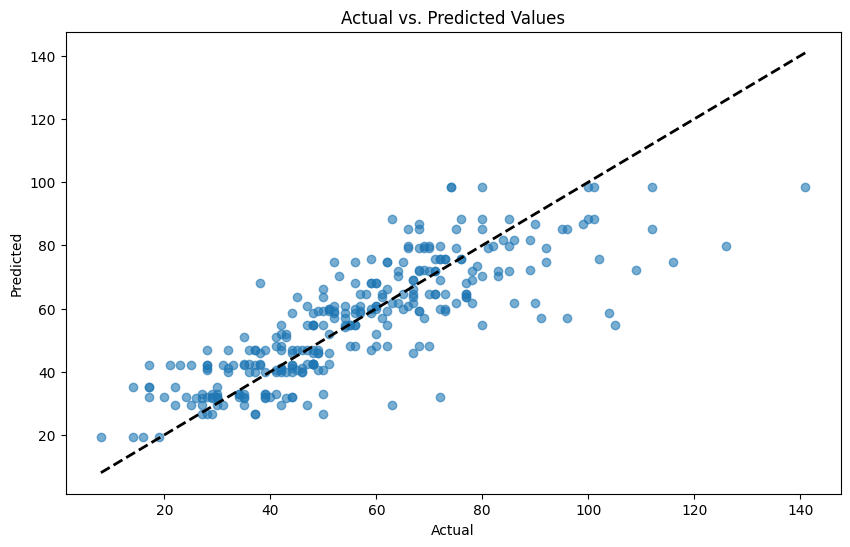

In [132]:
# Optional: Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

## Random Foerst

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [135]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [136]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [137]:
# Evaluate the model
y_pred = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Train Error (MSE): {mse}")
print(f"Mean Absolute Train Error (MAE): {mae}")
print(f"Train R² Score: {r2}")

Mean Squared Train Error (MSE): 19.70833367904184
Mean Absolute Train Error (MAE): 3.031228679653679
Train R² Score: 0.9596768592204747


In [ ]:
# Evaluate the model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")